<a href="https://colab.research.google.com/github/WankhedeAmey/ML/blob/main/Isomap_on_crabs_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import io
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

# Import dataset

In [9]:
crabs_data = pd.read_csv("crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

#The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).
crabs_data['class'] = crabs_data.species + crabs_data.sex

rel_feat = ['Frontal Lobe','Rear Width','Carapace Midline','Maximum Width','Body Depth']

crabs_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,25.5000,14.467083,1.0,13.000,25.50,38.000,50.0
Frontal Lobe,200.0,15.5830,3.495325,7.2,12.900,15.55,18.050,23.1
Rear Width,200.0,12.7385,2.573340,6.5,11.000,12.80,14.300,20.2
Carapace Midline,200.0,32.1055,7.118983,14.7,27.275,32.10,37.225,47.6
Maximum Width,200.0,36.4145,7.871955,17.1,31.500,36.80,42.000,54.6
Body Depth,200.0,14.0305,3.424772,6.1,11.400,13.90,16.600,21.6


# ISOMAP

This model maintains geodesic distance between all the points in the reduced dimension space. Geodesic distance is the shortest distance between two points on a surface. If the surface is a plane it would be equal to the Euclidean distance.

This method projects the data into a lower dimensional space trying to preserve the distances between neighbors (geodesic distance).

The method is based on local distances. When working with distances, it is important that all the variables have the same range, othersie a variable with large value could confuse a model

In [10]:
crabs_min_max = crabs_data.copy()

crabs_min_max[rel_feat] = MinMaxScaler().fit_transform(crabs_data[rel_feat])

crabs_min_max.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,25.500000,14.467083,1.0,13.000000,25.500000,38.000000,50.0
Frontal Lobe,200.0,0.527233,0.219832,0.0,0.358491,0.525157,0.682390,1.0
Rear Width,200.0,0.455365,0.187835,0.0,0.328467,0.459854,0.569343,1.0
Carapace Midline,200.0,0.529043,0.216382,0.0,0.382219,0.528875,0.684650,1.0
Maximum Width,200.0,0.515053,0.209919,0.0,0.384000,0.525333,0.664000,1.0
Body Depth,200.0,0.511645,0.220953,0.0,0.341935,0.503226,0.677419,1.0


## 2D Plot

Reconstruction Error: 0.009501240251169362


<Axes: xlabel='ISOMAP1', ylabel='ISOMAP2'>

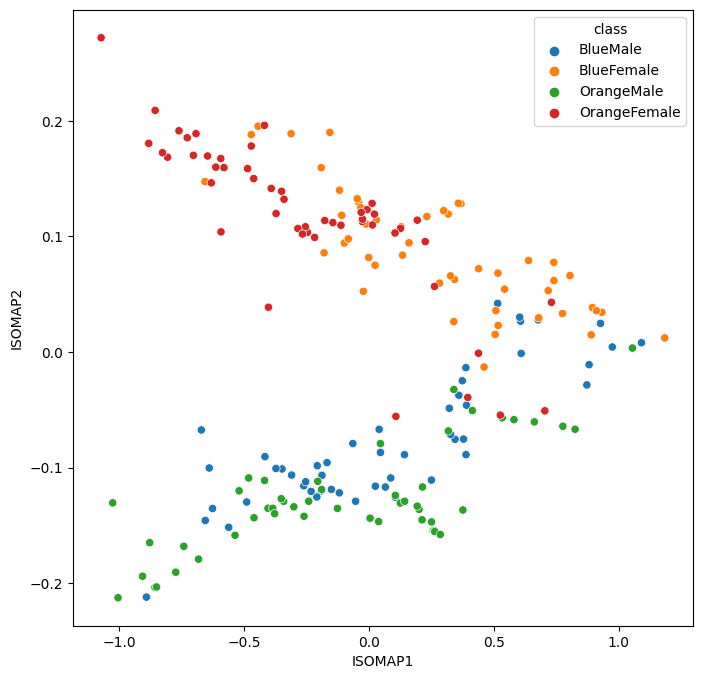

In [12]:
# init isomap object
isomap = Isomap(n_components=2, n_neighbors=10)

# apply isomap on dataset
crabs_isomap = isomap.fit_transform(crabs_min_max[rel_feat])

#add learned components to the dataset
crabs_min_max[['ISOMAP1', 'ISOMAP2']] = crabs_isomap

print("Reconstruction Error:", isomap.reconstruction_error())

fig=plt.figure(figsize=(8, 8))
sns.scatterplot(x='ISOMAP1', y='ISOMAP2', hue='class', data=crabs_min_max)

## 3D plot

In [14]:
# init isomap object
isomap = Isomap(n_components=3, n_neighbors=10)

# apply isomap on dataset
crabs_isomap = isomap.fit_transform(crabs_min_max[rel_feat])

#add learned components to the dataset
crabs_min_max[['ISOMAP1', 'ISOMAP2', 'ISOMAP3']] = crabs_isomap

print("Reconstruction Error:", isomap.reconstruction_error())

crabs_min_max.head()

Reconstruction Error: 0.007640087707465774


,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,ISOMAP1,ISOMAP2,ISOMAP3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,1.091359,0.008030,0.117078
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.974560,0.004326,0.106429
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.927329,0.024731,0.094621
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.881710,-0.010955,0.117162
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.872720,-0.028483,0.120854


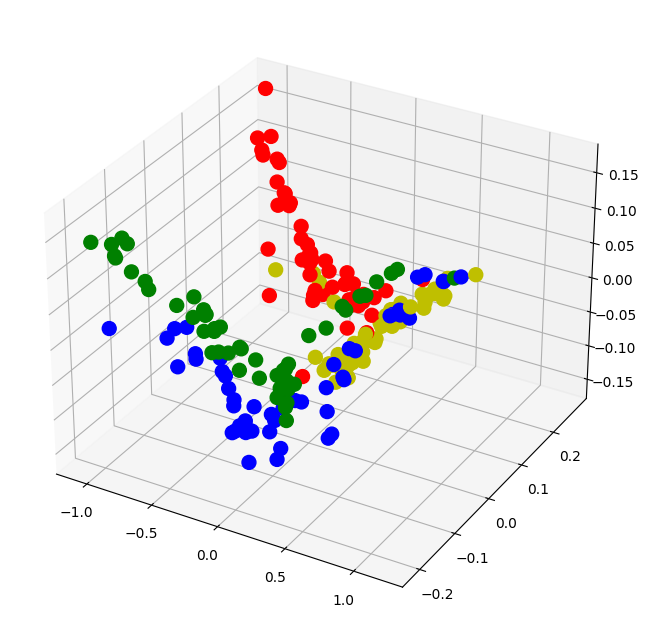

In [15]:
fig=plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111,projection='3d')
colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}

plt.scatter(crabs_min_max.ISOMAP1,crabs_min_max.ISOMAP2,zs=crabs_min_max.ISOMAP3,depthshade=False,
            c=crabs_min_max['class'].apply(lambda x: colors_crabs[x]),s=100)

## Plotly express

In [17]:
fig = px.scatter_3d(crabs_min_max, x='ISOMAP1', y='ISOMAP2', z='ISOMAP3', color='class')
fig.show()

# Summary

ISOMAP stands for Isometric Mapping. It is a nonlinear dimensionality reduction technique that aims to preserve the intrinsic geometry or underlying structure of high-dimensional data by representing it in a lower-dimensional space.

Key aspects of ISOMAP:

1. **Preserving Geometric Relationships**:
   - ISOMAP is based on the concept of preserving the intrinsic or underlying geometric relationships within the data.
   - It assumes that nearby points in high-dimensional space should remain close to each other in the reduced-dimensional space.

2. **Geodesic Distances**:
   - ISOMAP measures distances between points not in terms of straight-line Euclidean distance but in terms of geodesic distances along the manifold or underlying structure of the data.
   - It approximates these geodesic distances by considering the shortest path or minimum spanning tree between points in the high-dimensional space.

3. **Manifold Learning**:
   - ISOMAP is particularly useful for data that lies on or near a low-dimensional manifold embedded in a higher-dimensional space.
   - It helps to uncover the intrinsic low-dimensional structure hidden within the data.

4. **Algorithm**:
   - The ISOMAP algorithm involves constructing a neighborhood graph based on pairwise distances between points and then estimating geodesic distances using techniques like shortest path algorithms.
   - It then uses classical multidimensional scaling (MDS) to project the data into a lower-dimensional space while attempting to preserve these estimated geodesic distances.

5. **Applications**:
   - ISOMAP is applied in various fields such as computer vision, image processing, robotics, bioinformatics, and more.
   - It's useful for tasks like manifold learning, visualization of high-dimensional data, and feature extraction.

In summary, ISOMAP is a nonlinear dimensionality reduction technique designed to reveal the underlying structure of high-dimensional data by preserving the intrinsic geometric relationships among data points. It's particularly effective for data lying on low-dimensional manifolds within a higher-dimensional space.